# Soil Moisture Event Week
## Flood prediction through H SAF SM products

### 1. Impact of initial soil moisture conditions on flood simulation

In this exercise we will 
* run the MISDc rainfall-runoff model over the Tiber River Basin with ERA5 rainfall product
* extract the modelled soil moisture data to be compared with satellite-based products (H113 and H27)
* perform linear rescaling and filtering to satellite-based products to make them usable for rainfall-runoff simulation
* perform flood simulation with different soil moisture initial conditions

All the data are stored in the text file "TEVERE_DATA_NEW.txt".

We will use two satellite-based soil moisture products:
* H113 = surface soil moisture data record, based ONLY on satellite soil moisture data from ASCAT
* H27 = root-zone soil moisture obtained from the assimilation of ASCAT soil moisture into ECMWF IFS (Integrated Forecasting System)


Import the necessary python libraries

In [1]:
from MILc_2 import *
from pytesmo import temporal_matching
from pytesmo import metrics
import ascat
from pytesmo import scaling
from pytesmo.time_series.filters import exp_filter

Loading ground and satellite data into the workspace for the Tiber River Basin.

In [2]:
name='TEVERE'
data_input=pd.read_csv(name+'_DATA_NEW.txt',index_col=0,header = None, names = ['P','T',
                                                                            'Q','H113',
                                                                            'H27_1',
                                                                            'H27_2',
                                                                            'H27_3',
                                                                            'H27_4',
                                                                               'SM2R',
                                                                                'MERG'],
                       na_values='nan')

PAR=np.loadtxt(name+'_PAR_ERA5.txt')
Ab=5270
fig=1

Model run over the entire analysis with as input precipitation ERA5 reanalysis rainfall data (1st column named 'P').

/home/melone/hsaf_conda/envs/work_env/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


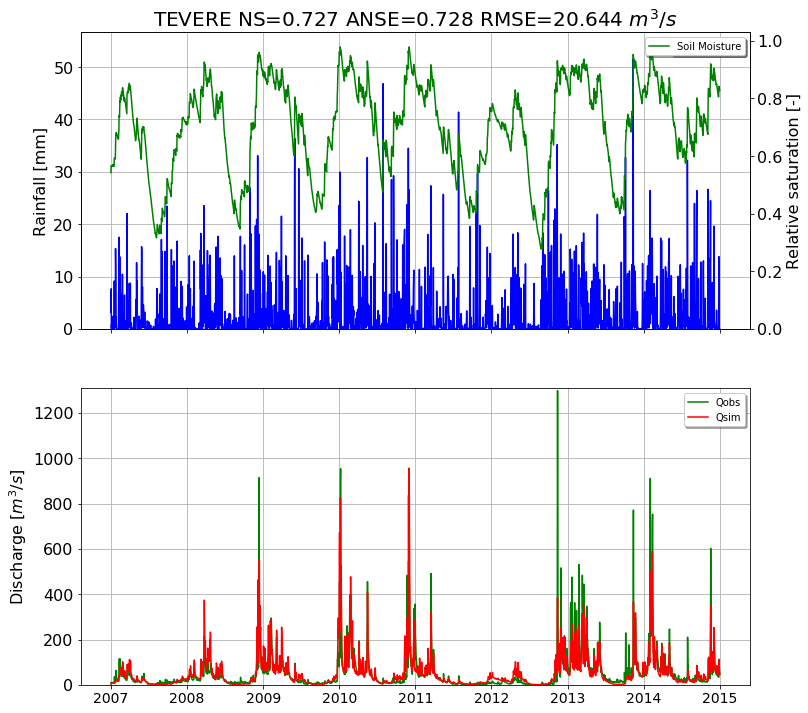

In [3]:
QobsQsim,data=MILC(name,data_input,PAR,Ab,fig)

The figure shows the temporal comparison between modelled and H27 soil moisture timeseries. Specifically, the soil moisture values over the H27 four layers are compared against the model outcomes. The Pearson's correlation coefficient is used to highlight this temporal agreement.

(0.7245530733774587, 0.0)
(0.8785742781377508, 0.0)
(0.9386188931231921, 0.0)
(0.9135554053374679, 0.0)


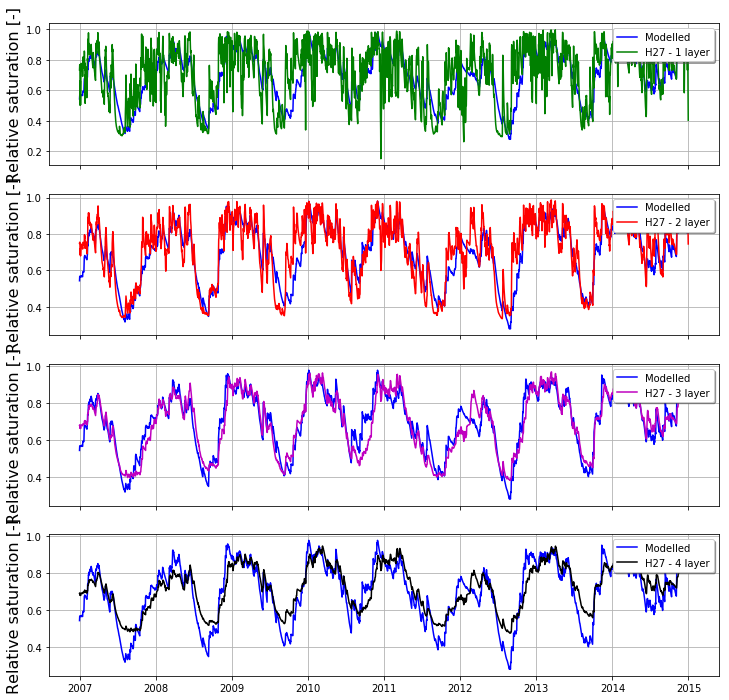

In [4]:
f, ax = plt.subplots(4, sharex=True, figsize=(12, 12))
ax[0].tick_params(axis='x', labelsize=14)
ax[0].plot(data.index, data['W'].values,label='Modelled',color='b')
ax[0].plot(data.index, data_input['H27_1'].values,label='H27 - 1 layer',color='g')
ax[1].plot(data.index, data['W'].values,label='Modelled',color='b')
ax[1].plot(data.index, data_input['H27_2'].values,label='H27 - 2 layer',color='r')
ax[2].plot(data.index, data['W'].values,label='Modelled',color='b')
ax[2].plot(data.index, data_input['H27_3'].values,label='H27 - 3 layer',color='m')
ax[3].plot(data.index, data['W'].values,label='Modelled',color='b')
ax[3].plot(data.index, data_input['H27_4'].values,label='H27 - 4 layer',color='k')
ax[0].set_ylabel('Relative saturation [-]', fontsize=16) 
ax[1].set_ylabel('Relative saturation [-]', fontsize=16) 
ax[2].set_ylabel('Relative saturation [-]', fontsize=16)
ax[3].set_ylabel('Relative saturation [-]', fontsize=16) 
ax[0].grid(True)
ax[1].grid(True)
ax[2].grid(True)
ax[3].grid(True)
ax[0].legend(loc='upper right', shadow=True)
ax[1].legend(loc='upper right', shadow=True)
ax[2].legend(loc='upper right', shadow=True)
ax[3].legend(loc='upper right', shadow=True)
R_1=metrics.pearsonr(data['W'].values,data_input['H27_1'].values)
R_2=metrics.pearsonr(data['W'].values,data_input['H27_2'].values)
R_3=metrics.pearsonr(data['W'].values,data_input['H27_3'].values)
R_4=metrics.pearsonr(data['W'].values,data_input['H27_4'].values)
print(R_1)
print(R_2)
print(R_3)
print(R_4)
f.savefig('SMsim_H27vsModel', dpi=120)

The better Pearson's correlation, R, is obtained with layer 3 equal to 0.94

In this step, the exponential filter is applied to H113 surface soil moisture timeseries in order to match the temporal variance of the satellite soil moisture observations with the one of the modelled soil moisture. In order to define the optimal filter parametrization, estimate several Soil Water Index (SWI) timeseries, by changing the "ctime" parameter. 

In [5]:
jd = data.index.to_julian_date().get_values()
SWI_5=exp_filter(data_input['H113'].values/100, jd, ctime=5)
SWI_15=exp_filter(data_input['H113'].values/100, jd, ctime=15)
SWI_30=exp_filter(data_input['H113'].values/100, jd, ctime=30)
SWI_50=exp_filter(data_input['H113'].values/100, jd, ctime=50)

The figure shows the temporal agreement between modelled and SWI timeseries. Specifically, the SWI estimated in the previous step is compared against the model outcomes and the Pearson's correlation coefficient is used to evaluate the temporal agreement between the two. 

(0.756675436173654, 0.0)
(0.8401035480307588, 0.0)
(0.8796023790921346, 0.0)
(0.869721238751584, 0.0)


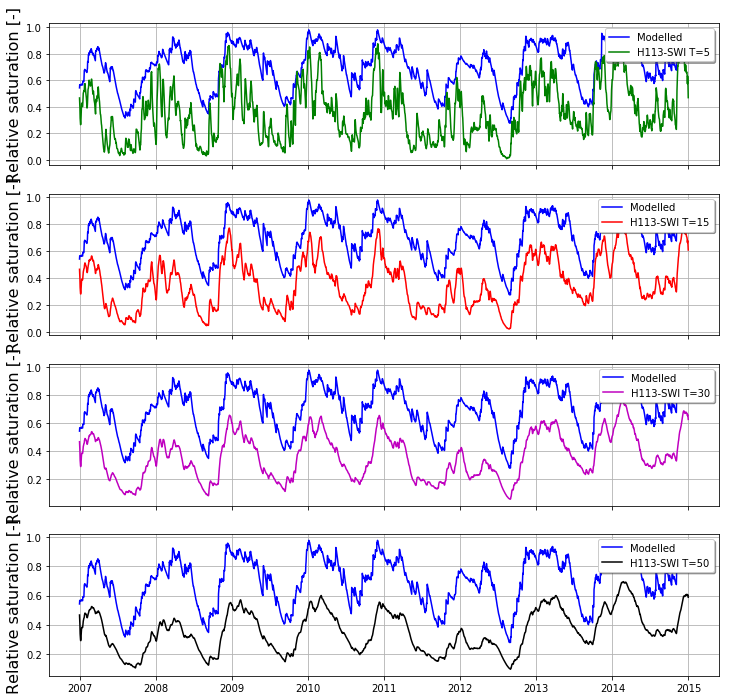

In [6]:
f, ax = plt.subplots(4, sharex=True, figsize=(12, 12))
ax[0].tick_params(axis='x', labelsize=14)
ax[0].plot(data.index, data['W'].values,label='Modelled',color='b')
ax[0].plot(data.index, SWI_5,label='H113-SWI T=5',color='g')
ax[1].plot(data.index, data['W'].values,label='Modelled',color='b')
ax[1].plot(data.index, SWI_15,label='H113-SWI T=15',color='r')
ax[2].plot(data.index, data['W'].values,label='Modelled',color='b')
ax[2].plot(data.index, SWI_30,label='H113-SWI T=30',color='m')
ax[3].plot(data.index, data['W'].values,label='Modelled',color='b')
ax[3].plot(data.index, SWI_50,label='H113-SWI T=50',color='k')
ax[0].set_ylabel('Relative saturation [-]', fontsize=16) 
ax[1].set_ylabel('Relative saturation [-]', fontsize=16) 
ax[2].set_ylabel('Relative saturation [-]', fontsize=16)
ax[3].set_ylabel('Relative saturation [-]', fontsize=16) 
ax[0].grid(True)
ax[1].grid(True)
ax[2].grid(True)
ax[3].grid(True)
ax[0].legend(loc='upper right', shadow=True)
ax[1].legend(loc='upper right', shadow=True)
ax[2].legend(loc='upper right', shadow=True)
ax[3].legend(loc='upper right', shadow=True)
R_5=metrics.pearsonr(data['W'].values,SWI_5)
R_6=metrics.pearsonr(data['W'].values,SWI_15)
R_7=metrics.pearsonr(data['W'].values,SWI_30)
R_8=metrics.pearsonr(data['W'].values,SWI_50)

print(R_5)
print(R_6)
print(R_7)
print(R_8)
f.savefig('SMsim_H113vsModel', dpi=120)

The better Pearson's correlation, R, is obtained with T=30 days equal to 0.88

In this step, a simple mean-variance linear rescaling technique is applied to the optimal H27 and SWI timeseries in order to match their mean and variance with the one of the modelled soil moisture. 
DATA_SAT dataframe is created storing all the needed soil moisture data

In [7]:
SWI_best=SWI_30
H27_best=data_input['H27_3'].values
SAT_scaled=scaling.mean_std(SWI_best,data['W'].values)
H27_scaled=scaling.mean_std(H27_best,data['W'].values)

DATA_SAT=pd.DataFrame({"H113": data_input['H113'].values/100, "SWI": SWI_best, "SWI_rescaled": SAT_scaled,
                       "H27": H27_best, "H27_rescaled": H27_scaled}, index=data.index)

The figure shows the satellite-based soil moisture datasets before and after the linear rescaling step.

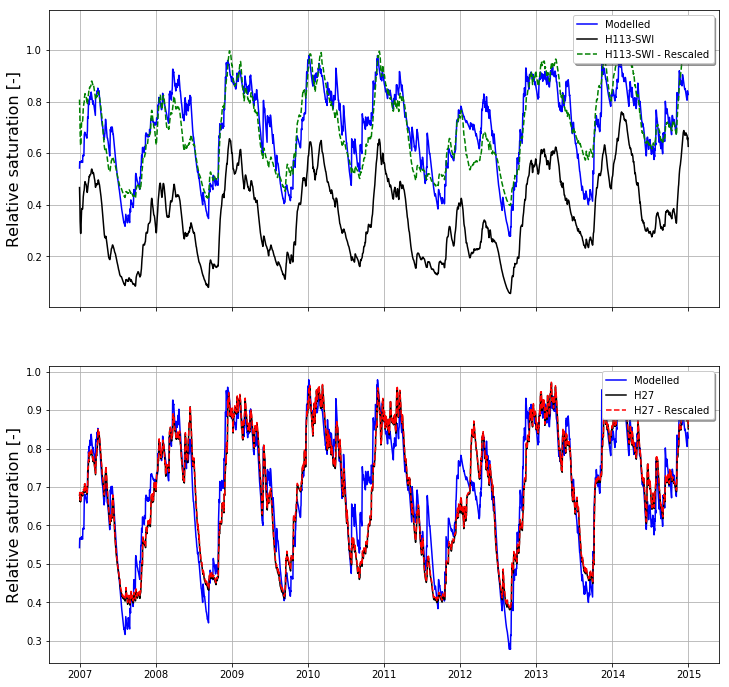

In [8]:
f, ax = plt.subplots(2, sharex=True, figsize=(12, 12))
ax[0].tick_params(axis='x', labelsize=14)
ax[0].plot(data.index, data['W'].values,label='Modelled',color='b')
ax[0].plot(data.index, SWI_best,'k',label='H113-SWI',color='k')
ax[0].plot(data.index, SAT_scaled,'g--',label='H113-SWI - Rescaled',color='g')

ax[1].plot(data.index, data['W'].values,label='Modelled',color='b')
ax[1].plot(data.index, H27_best,'k',label='H27',color='k')
ax[1].plot(data.index, H27_scaled,'r--',label='H27 - Rescaled',color='r')
ax[0].set_ylabel('Relative saturation [-]', fontsize=16)
ax[1].set_ylabel('Relative saturation [-]', fontsize=16)
ax[0].grid(True)
ax[1].grid(True)
ax[0].legend(loc='upper right', shadow=True)
ax[1].legend(loc='upper right', shadow=True)

f.savefig('SMsim_H113_H27_resvsModel', dpi=120)

In this step, the model is run for a flood event identified by a start ("start_ev1" variable) and end date ("end_ev1" variable). The soil moisture conditions at the beginning of the flood event are set equal to the ones provided by the model simulation, in order to obtain a reference run.

In [9]:
start_ev1='2010-11-11'
end_ev1='2010-12-11'
mask_ev1=(data.index > start_ev1) & (data.index <= end_ev1)
Ev1=data_input.iloc[mask_ev1]

Initial Soil Moisture from Model=0.8723968455202379


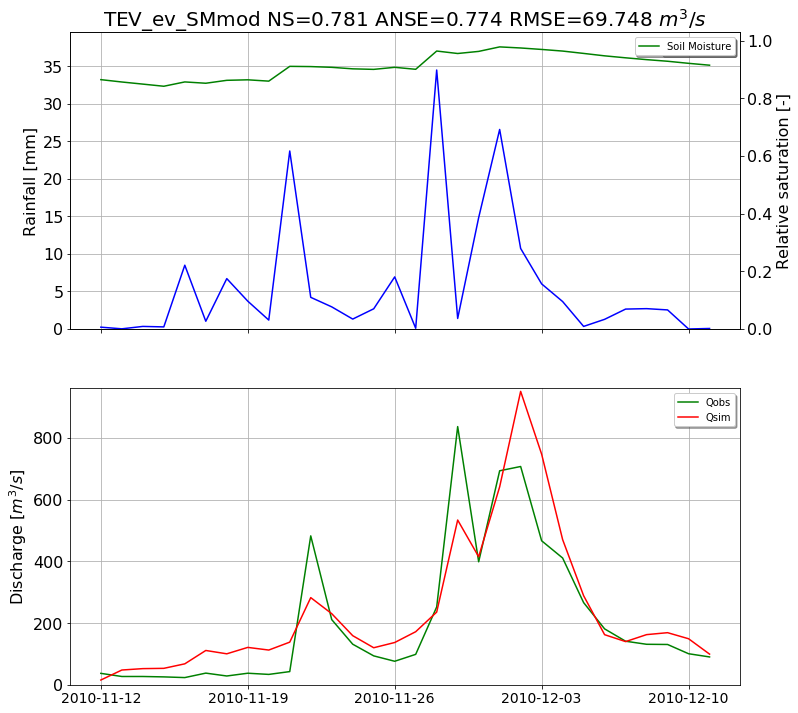

In [10]:
PAR[0]=data['W'].iloc[mask_ev1][0]
print('Initial Soil Moisture from Model='+str(PAR[0]))
QobsQsim,data=MILC('TEV_ev_SMmod',Ev1,PAR,Ab,fig)
Data_1=pd.DataFrame(data['W'].values, index=data.index)
Data_1.columns=['W_MOD']
Data_1=Data_1.join(data['S'])
Data_1.rename(columns={'S':'S_MOD'},inplace=True)

In this step, the soil moisture conditions at the beginning of the flood event are set equal to the ones provided by the SWI applied to H113.

Initial Soil Moisture from SWI=0.4259260297805447


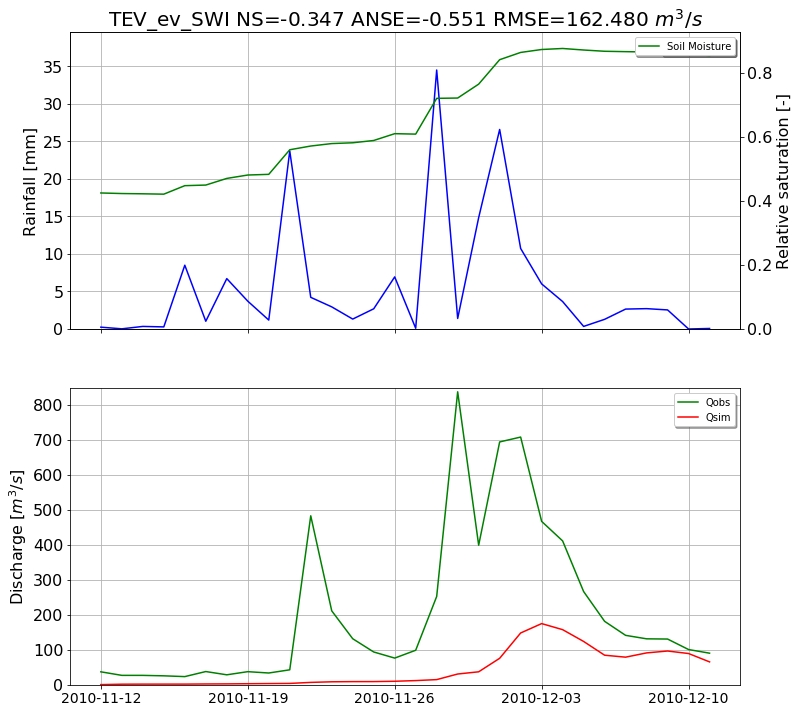

In [11]:
PAR[0]=DATA_SAT.iloc[mask_ev1]['SWI'][0]
print('Initial Soil Moisture from SWI='+str(PAR[0]))
QobsQsim,data=MILC('TEV_ev_SWI',Ev1,PAR,Ab,fig)
Data_1=Data_1.join(data['W'])
Data_1.rename(columns={'W':'W_SWI'},inplace=True)
Data_1=Data_1.join(data['S'])
Data_1.rename(columns={'S':'S_SWI'},inplace=True)

In this step, the soil moisture conditions at the beginning of the flood event are set equal to the ones provided by the SWI rescaled estimates. Which is the impact of the changed initial soil moisture condition in terms of discharge simulation?

Initial Soil Moisture from SWi Rescaled=0.7672590804612407


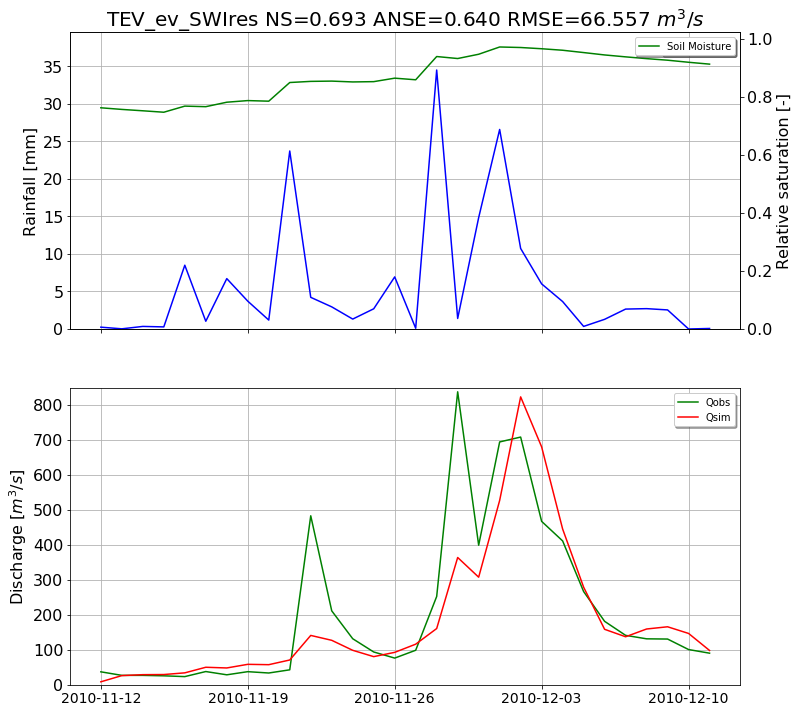

In [12]:
PAR[0]=DATA_SAT.iloc[mask_ev1]['SWI_rescaled'][0]
print('Initial Soil Moisture from SWi Rescaled='+str(PAR[0]))
QobsQsim,data=MILC('TEV_ev_SWIres',Ev1,PAR,Ab,fig)
Data_1=Data_1.join(data['W'])
Data_1.rename(columns={'W':'W_SWI_rescaled'},inplace=True)
Data_1=Data_1.join(data['S'])
Data_1.rename(columns={'S':'S_SWI_rescaled'},inplace=True)

In this step, the soil moisture conditions at the beginning of the flood event are set equal to the ones provided by the H27 rescaled estimates.

Initial Soil Moisture from H27 Rescaled=0.7610395299622494


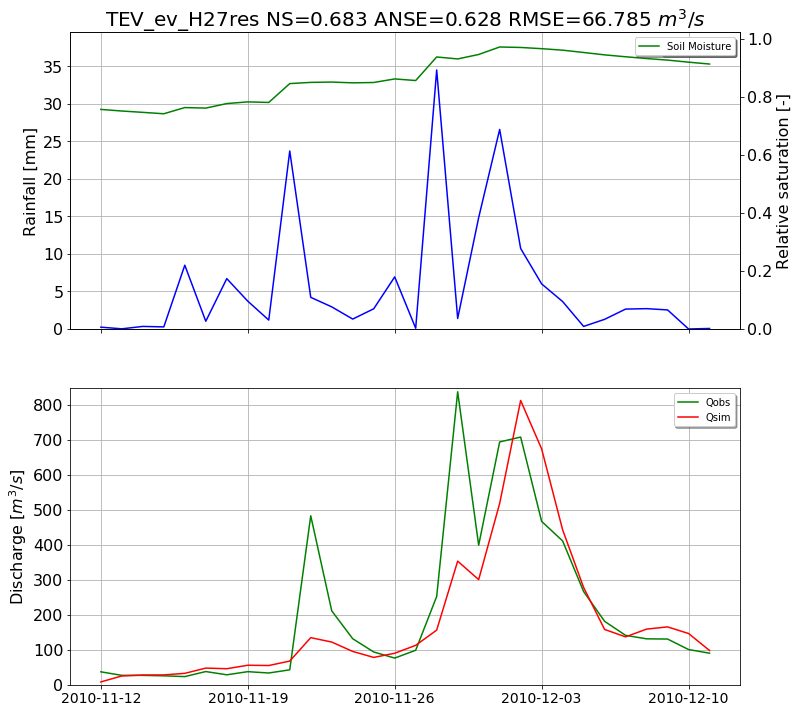

In [13]:
PAR[0]=DATA_SAT.iloc[mask_ev1]['H27_rescaled'][0]
print('Initial Soil Moisture from H27 Rescaled='+str(PAR[0]))
QobsQsim,data=MILC('TEV_ev_H27res',Ev1,PAR,Ab,fig)
Data_1=Data_1.join(data['W'])
Data_1.rename(columns={'W':'W_H27_rescaled'},inplace=True)
Data_1=Data_1.join(data['S'])
Data_1.rename(columns={'S':'S_H27_rescaled'},inplace=True)

After the different model runs, identify the soil moisture initial condition that provided the best NS value.

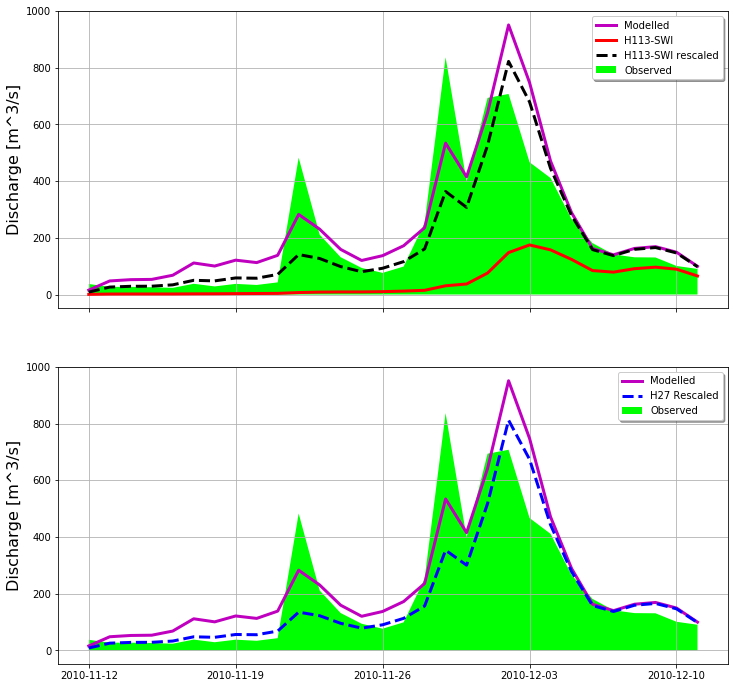

In [14]:
f, ax = plt.subplots(2, sharex=True, figsize=(12, 12))
ax[0].tick_params(axis='x', labelsize=14)
ax[0].fill_between(Ev1.index, Ev1['Q'].values,label='Observed',facecolor=(0, 1, 0))
ax[0].plot(Data_1.index, Data_1['S_MOD'].values,label='Modelled',color='m',linewidth=3.0)
ax[0].plot(Data_1.index, Data_1['S_SWI'].values,label='H113-SWI',color='r',linewidth=3.0)
ax[0].plot(Data_1.index, Data_1['S_SWI_rescaled'].values,'r--',label='H113-SWI rescaled',color='k',linewidth=3.0)

ax[1].fill_between(Ev1.index, Ev1['Q'].values,label='Observed',facecolor=(0, 1, 0))
ax[1].plot(Data_1.index, Data_1['S_MOD'].values,label='Modelled',color='m',linewidth=3.0)
ax[1].plot(Data_1.index, Data_1['S_H27_rescaled'].values,'r--',label='H27 Rescaled',color='b',
           linewidth=3.0)
ax[0].set_ylabel('Discharge [m^3/s]', fontsize=16) 
ax[1].set_ylabel('Discharge [m^3/s]', fontsize=16) 
ax[0].grid(True)
ax[1].grid(True)
ax[0].legend(loc='upper right', shadow=True)
ax[1].legend(loc='upper right', shadow=True)
f.savefig('Qsim_Event_SMcond', dpi=120)

### 2. Satellite Soil Moisture for Improving Rainfall through SM2RAIN

In this exercise we will run the MISDc rainfall-runoff model over the Tiber River Basin with different rainfall products as input:
* ERA5 reanalysis rainfall
* SM2RAIN-ASCAT satellite rainfall obtained from H SAF ASCAT soil moisture
* merged rainfall product P-MERG= 0.85 x ERA5+0.15 x SM2RAIN-ASCAT

We will compare the performance of each product to assess the potential benefit of correcting rainfall with satellite soil moisture through SM2RAIN.

All the data are stored in the text file "TEVERE_DATA_NEW.txt".

Import the necessary python libraries

In [15]:
from MILc_2 import *
from pytesmo import temporal_matching
from pytesmo import metrics
import ascat
from pytesmo import scaling
from pytesmo.time_series.filters import exp_filter

Loading ground and satellite data into the workspace for the Tiber River Basin.

In [16]:
name='TEV_ERA5'
data_input=pd.read_csv('TEVERE'+'_DATA_NEW.txt',index_col=0,header = None, names = ['P','T',
                                                                            'Q','H113',
                                                                            'H27_1',
                                                                            'H27_2',
                                                                            'H27_3',
                                                                            'H27_4',
                                                                               'SM2R',
                                                                                'MERG'],
                       na_values='nan')

PAR_ERA5=np.loadtxt('TEVERE'+'_PAR_ERA5.txt')
PAR_SM2R=np.loadtxt('TEVERE'+'_PAR_SM2R.txt')
PAR_MERG=np.loadtxt('TEVERE'+'_PAR_MERG.txt')
Ab=5270
fig=1

Structure of the input dataset

In [17]:
data_input[0:20]

,P,T,Q,H113,H27_1,H27_2,H27_3,H27_4,SM2R,MERG
2007-01-01 00:00:00,3.202349,8.140181,10.079916,46.676248,0.731786,0.748055,0.679018,0.691044,0.000000,2.657950
2007-01-02 00:00:00,7.674754,5.520864,9.934817,40.011059,0.767268,0.754463,0.681876,0.692929,0.000000,6.370046
2007-01-03 00:00:00,0.053418,1.178245,9.789718,32.062826,0.760015,0.751631,0.681094,0.692376,0.000000,0.044337
2007-01-04 00:00:00,0.877974,2.309108,9.644619,17.218505,0.500714,0.686350,0.662666,0.680064,0.000000,0.728718
2007-01-05 00:00:00,0.105998,3.835236,8.970421,21.853204,0.660676,0.720025,0.672820,0.686809,0.138724,0.111561
2007-01-06 00:00:00,0.015409,2.906701,8.465723,20.258275,0.503481,0.679019,0.661218,0.679051,0.505477,0.098721
2007-01-07 00:00:00,0.402833,6.070475,8.875051,27.481828,0.647051,0.710425,0.670801,0.685421,5.055940,1.193861
2007-01-08 00:00:00,1.825983,6.976988,8.891839,41.147828,0.729952,0.729314,0.676806,0.689404,8.566163,2.971814
2007-01-09 00:00:00,0.014361,5.740076,9.584285,53.950983,0.775157,0.742349,0.681023,0.692197,6.455199,1.109303
2007-01-10 00:00:00,0.060421,4.639126,10.388340,52.978213,0.766440,0.743236,0.681758,0.692666,2.553935,0.484318


<div style="text-align: justify">Model run over the entire analysis with as input precipitation ERA5 reanalysis data.</div>

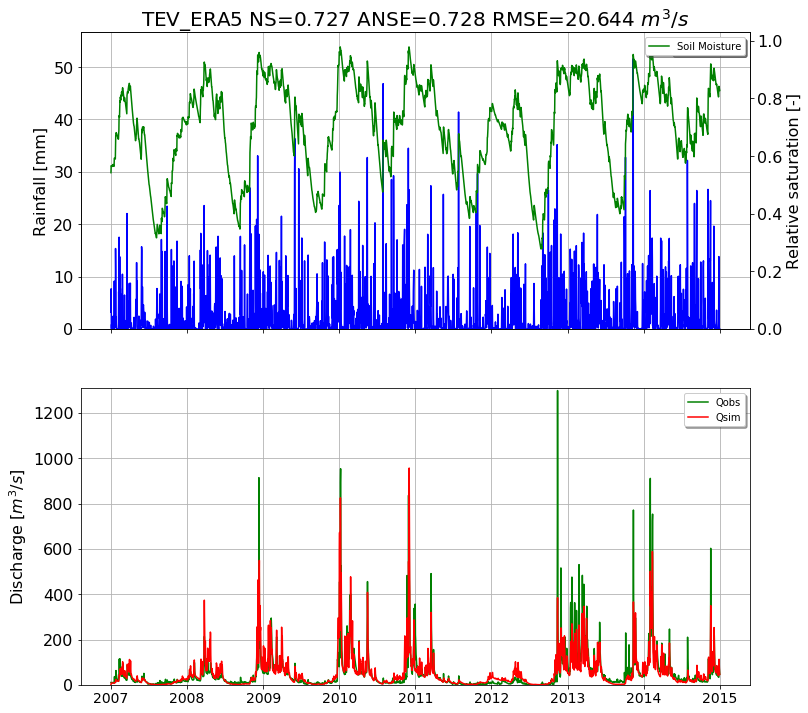

In [18]:
QobsQsim,data_ERA5=MILC(name,data_input,PAR_ERA5,Ab,1)

<div style="text-align: justify">Model run over the entire analysis with as input precipitation SM2RAIN-ASCAT rainfall data.</div>

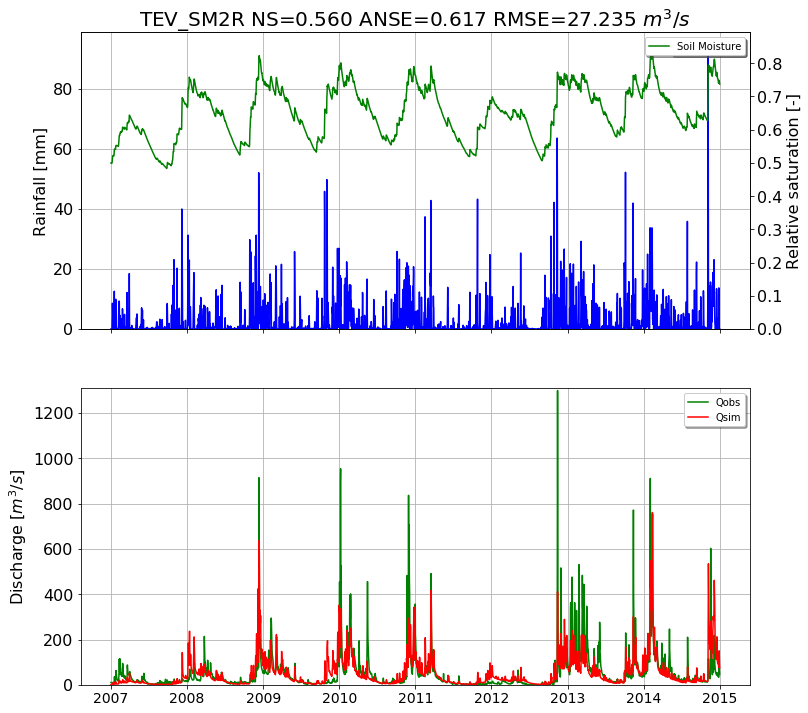

In [19]:
name='TEV_SM2R'
data_input1=pd.read_csv('TEVERE'+'_DATA_NEW.txt',index_col=0,header = None, names = ['PERA5','T',
                                                                            'Q','H113',
                                                                            'H27_1',
                                                                            'H27_2',
                                                                            'H27_3',
                                                                            'H27_4',
                                                                               'P',
                                                                                'MERG'],
                       na_values='nan')
QobsQsim,data_SM2R=MILC(name,data_input1,PAR_SM2R,Ab,1)

Model run over the entire analysis with as input precipitation 0.85ERA5+0.15SM2RAIN-ASCAT rainfall data.

The figures show observed and simulated discharge for the different run in two subperiods.

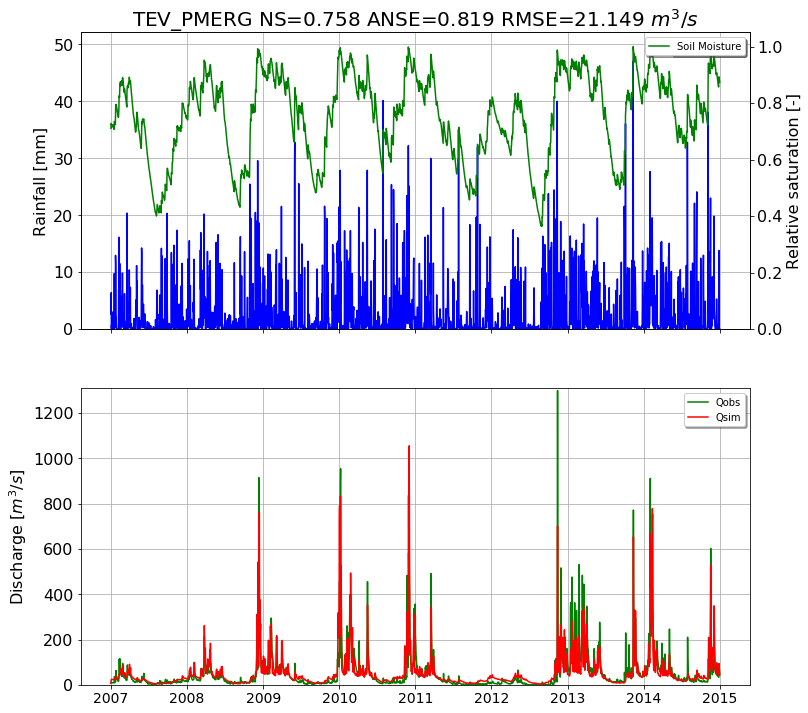

In [20]:
name='TEV_PMERG'
data_input2=pd.read_csv('TEVERE'+'_DATA_NEW.txt',index_col=0,header = None, names = ['PERA5','T',
                                                                            'Q','H113',
                                                                            'H27_1',
                                                                            'H27_2',
                                                                            'H27_3',
                                                                            'H27_4',
                                                                               'SM2R',
                                                                                'P'],
                       na_values='nan')

QobsQsim,data_MERG=MILC(name,data_input2,PAR_MERG,Ab,1)

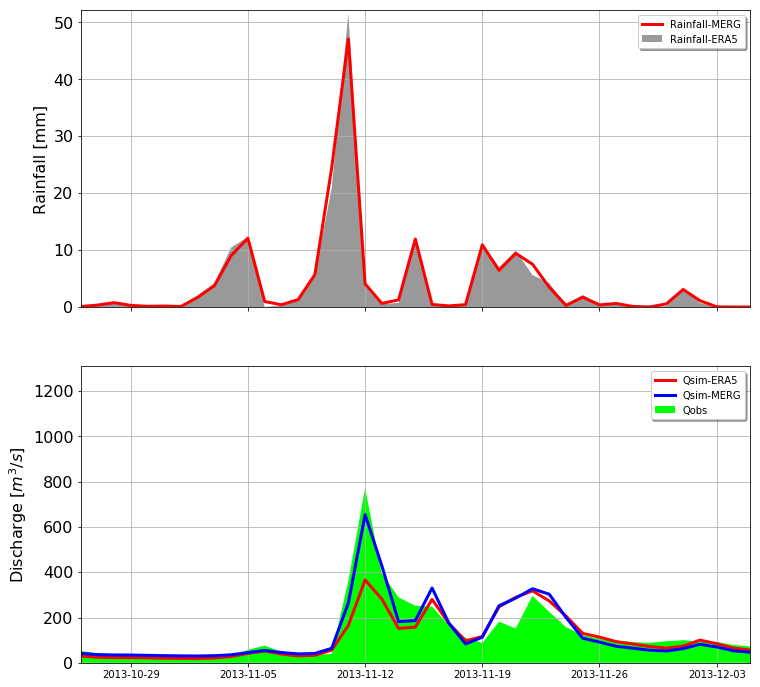

In [21]:
ID0=2490
ID1=2530

f, ax = plt.subplots(2, sharex=True, figsize=(12, 12))
ax[0].fill_between(data_MERG.index, data_ERA5['P'].values,label='Rainfall-ERA5',facecolor=(.6, .6, .6))
ax[0].plot(data_MERG.index, data_MERG['P'].values,label='Rainfall-MERG',color='r',linewidth=3.0)
ax[0].set_ylim(0,np.max(data_MERG['P'].values)+5)
ax[0].set_xlim(data_MERG.index[ID0],data_MERG.index[ID1])
ax[0].set_ylabel('Rainfall [mm]', fontsize=16)
ax[0].grid(True)
ax[0].tick_params(axis='y', labelsize=16)
ax[0].legend(loc='upper right', shadow=True)

ax[1].fill_between(data_MERG.index, data_MERG['Q'].values,label='Qobs',facecolor=(0, 1, 0))
ax[1].plot(data_ERA5.index, data_ERA5['S'].values,label='Qsim-ERA5',color='r',linewidth=3.0)
ax[1].plot(data_MERG.index, data_MERG['S'].values,label='Qsim-MERG',color='b',linewidth=3.0)
ax[1].set_xlim(data_MERG.index[ID0],data_MERG.index[ID1])
ax[1].set_ylim(0,np.max(data_MERG.max())+10)
ax[1].set_ylabel('Discharge [$m^3/s$]', fontsize=16)
ax[1].grid(True)
ax[1].tick_params(axis='y', labelsize=16)
ax[1].legend(loc='upper right', shadow=True)
                
f.savefig('Qsim_nov2013', dpi=120)

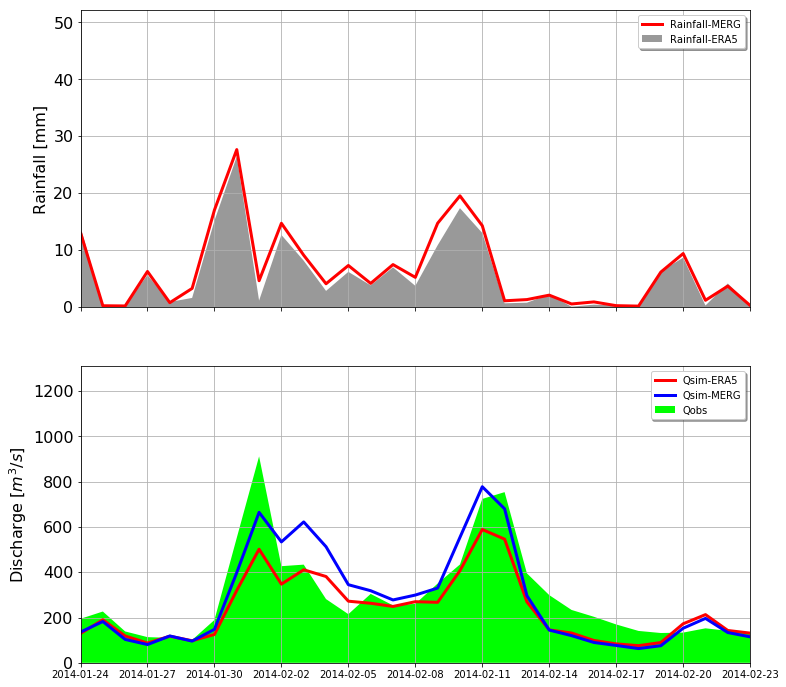

In [22]:
ID0=2580
ID1=2610

f, ax = plt.subplots(2, sharex=True, figsize=(12, 12))
ax[0].fill_between(data_MERG.index, data_ERA5['P'].values,label='Rainfall-ERA5',facecolor=(.6, .6, .6))
ax[0].plot(data_MERG.index, data_MERG['P'].values,label='Rainfall-MERG',color='r',linewidth=3.0)
ax[0].set_ylim(0,np.max(data_MERG['P'].values)+5)
ax[0].set_xlim(data_MERG.index[ID0],data_MERG.index[ID1])
ax[0].set_ylabel('Rainfall [mm]', fontsize=16)
ax[0].grid(True)
ax[0].tick_params(axis='y', labelsize=16)
ax[0].legend(loc='upper right', shadow=True)

ax[1].fill_between(data_MERG.index, data_MERG['Q'].values,label='Qobs',facecolor=(0, 1, 0))
ax[1].plot(data_ERA5.index, data_ERA5['S'].values,label='Qsim-ERA5',color='r',linewidth=3.0)
ax[1].plot(data_MERG.index, data_MERG['S'].values,label='Qsim-MERG',color='b',linewidth=3.0)
ax[1].set_xlim(data_MERG.index[ID0],data_MERG.index[ID1])
ax[1].set_ylim(0,np.max(data_MERG.max())+10)
ax[1].set_ylabel('Discharge [$m^3/s$]', fontsize=16)
ax[1].grid(True)
ax[1].tick_params(axis='y', labelsize=16)
ax[1].legend(loc='upper right', shadow=True)
        
f.savefig('Qsim_jan2014', dpi=120)

## Lab done!!!